# Predicting Evergreeness of Content with Decision Trees and Random Forests

In [1]:
## DATA DICTIONARY

In [5]:
!pip install geojson

In [7]:
import Geojson

ImportError: No module named Geojson

In [8]:
import pandas as pd
import json

data = pd.read_csv("../../assets/dataset/stumbleupon.tsv", sep='\t')
# tab separated \t = tab
data['title'] = data.boilerplate.apply(lambda x: json.loads(x).get('title', ''))
# boilerplate stringified json object 
# returning title and body from boilerplate column
# .map similar to .apply
data['body'] = data.boilerplate.apply(lambda x: json.loads(x).get('body', ''))
# .loads makes it a json obs, once json obj will get the title key
data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label,title,body
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,24,0,5424,170,8,0.152941,0.079130,0,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,40,0,4973,187,9,0.181818,0.125448,1,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,55,0,2240,258,11,0.166667,0.057613,1,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,24,0,2737,120,5,0.041667,0.100858,1,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,14,0,12032,162,10,0.098765,0.082569,0,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...


In [3]:
data.dtypes
# something is a string - use string parsing - convert to json obj - just like dictionary - refer to key value
# stringified json obj cast to json obj
# json obj 

url                                object
urlid                               int64
boilerplate                        object
alchemy_category                   object
alchemy_category_score             object
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
is_news                            object
lengthyLinkDomain                   int64
linkwordscore                       int64
news_front_page                    object
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                   

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender. A description of the columns is below:

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
title|string|Title of the article
body|string|Body text of article
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonlinkratio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonlinkratio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonlinkratio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonlinkratio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?

> #### Evergreen sites are those that are always relevant.  As opposed to breaking news or current events, evergreen websites are relevant no matter the time or season. 

> #### A sample of URLs is below, where label = 1 are 'evergreen' websites

In [9]:
data[['url', 'label']].head()

,url,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,0
1,http://www.popsci.com/technology/article/2012-...,1
2,http://www.menshealth.com/health/flu-fighting-...,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,1
4,http://bleacherreport.com/articles/1205138-the...,0


### Exercises to Get Started

> ### Exercise: 1. In a group: Brainstorm 3 - 5 features you could develop that would be useful for predicting evergreen websites.
 ###  Exercise: 2. After looking at the dataset, can you model or quantify any of the characteristics you wanted?
- I.E. If you believe high-image content websites are likely to be evergreen, how can you build a feature that represents that?
- I.E. If you believe weather content is likely NOT to be evergreen, how might you build a feature that represents that?

### Split up and develop 1-3 of the those features independently.

> ### Exercise: 3. Does being a news site affect evergreeness? 
Compute or plot the percentage of news related evergreen sites.

In [14]:
# ... #
data.groupby(['label', 'is_news']).size()

label  is_news
0      1          2199
       ?          1400
1      1          2353
       ?          1443
dtype: int64

In [27]:
data.groupby(['label', 'is_news']).describe()

avglinksize  commonlinkratio_1  commonlinkratio_2  \
label is_news                                                            
0     1       count  2199.000000        2199.000000        2199.000000   
              mean      2.479331           0.470950           0.213914   
              std       4.163702           0.189601           0.141834   
              min       0.000000           0.000000           0.000000   
              25%       1.670732           0.348538           0.108194   
              50%       2.177474           0.486842           0.203390   
              75%       2.752300           0.609242           0.293350   
              max     161.538462           1.000000           0.866667   
      ?       count  1400.000000        1400.000000        1400.000000   
              mean      3.065084           0.419253           0.181998   
              std       7.943761           0.226565           0.150608   
              min       0.000000           0.000000           0.000000   
              25%       1.471421           0.268293           0.057497   
              50%       2.084700           0.424621           0.162033   
              75%       2.748144           0.588235           0.277655   
              max     161.000000           1.000000           1.000000   
1     1       count  2353.000000        2353.000000        2353.000000   
              mean      2.182281           0.491167           0.231372   
              std       2.126496           0.184010           0.140314   
              min       0.000000           0.000000           0.000000   
              25%       1.583333           0.370690           0.133333   
              50%       2.012605           0.500000           0.220264   
              75%       2.484472           0.620000           0.310345   
              max      61.833333           0.991453           0.982906   
      ?       count  1443.000000        1443.000000        1443.000000   
              mean      3.843111           0.474203           0.217262   
              std      16.853285           0.220280           0.155354   
              min       0.000000           0.000000           0.000000   
              25%       1.641407           0.343026           0.101887   
              50%       2.097222           0.471074           0.196970   
              75%       2.558847           0.651363           0.315074   
              max     363.000000           0.987597           0.980392   

                     commonlinkratio_3  commonlinkratio_4  compression_ratio  \
label is_news                                                                  
0     1       count        2199.000000        2199.000000        2199.000000   
              mean            0.088230           0.048539           2.056776   
              std             0.089807           0.068202           5.383938   
              min             0.000000           0.000000           0.000000   
              25%             0.022514           0.000000           0.443599   
              50%             0.064000           0.025641           0.490074   
              75%             0.130137           0.067416           0.571301   
              max             0.702170           0.626866          21.000000   
      ?       count        1400.000000        1400.000000        1400.000000   
              mean            0.071233           0.034970           3.466200   
              std             0.085095           0.060242           7.143394   
              min             0.000000           0.000000           0.000000   
              25%             0.000000           0.000000           0.451943   
              50%             0.041096           0.009210           0.521664   
              75%             0.113821           0.045226           0.724654   
              max             0.719086           0.544355          21.000000   
1     1       count        2353.000000        2353.000000       

In [30]:
news_evergreen = data.groupby(['label', 'is_news']).apply(lambda group: len(group)).reset_index()
news_evergreen.dtypes

label       int64
is_news    object
0           int64
dtype: object

In [43]:
news_evergreen.columns = ['label', 'isNews', 'countTotal']

In [44]:
news_evergreen

,label,isNews,countTotal
0,0,1,2199
1,0,?,1400
2,1,1,2353
3,1,?,1443


In [45]:
total = news_evergreen.countTotal.sum()
total

7395L

In [26]:
# x = data[(data.label == 1) & (data.is_news == 1)].shape
# x

(0, 29)

> ### Exercise: 4. Does category in general affect evergreeness? 
Plot the rate of evergreen sites for all Alchemy categories.

In [48]:
% matplotlib inline

alchemy_category
?                     Axes(0.125,0.125;0.775x0.775)
arts_entertainment    Axes(0.125,0.125;0.775x0.775)
business              Axes(0.125,0.125;0.775x0.775)
computer_internet     Axes(0.125,0.125;0.775x0.775)
culture_politics      Axes(0.125,0.125;0.775x0.775)
gaming                Axes(0.125,0.125;0.775x0.775)
health                Axes(0.125,0.125;0.775x0.775)
law_crime             Axes(0.125,0.125;0.775x0.775)
recreation            Axes(0.125,0.125;0.775x0.775)
religion              Axes(0.125,0.125;0.775x0.775)
science_technology    Axes(0.125,0.125;0.775x0.775)
sports                Axes(0.125,0.125;0.775x0.775)
unknown               Axes(0.125,0.125;0.775x0.775)
weather               Axes(0.125,0.125;0.775x0.775)
dtype: object

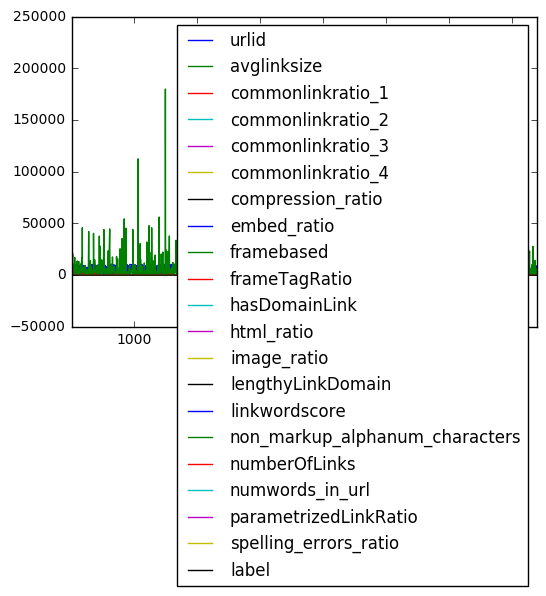

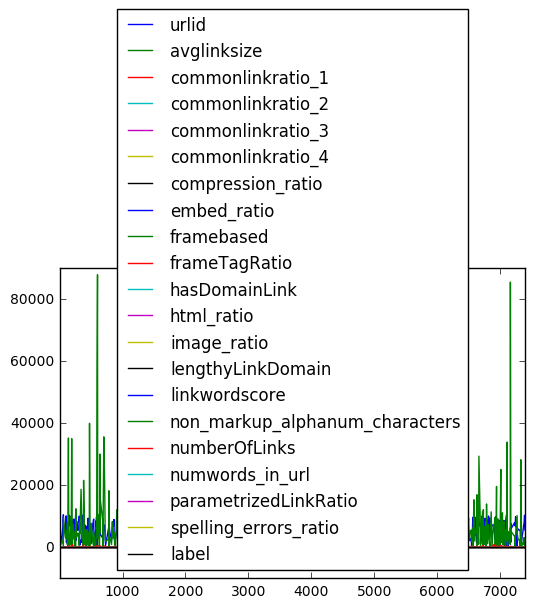

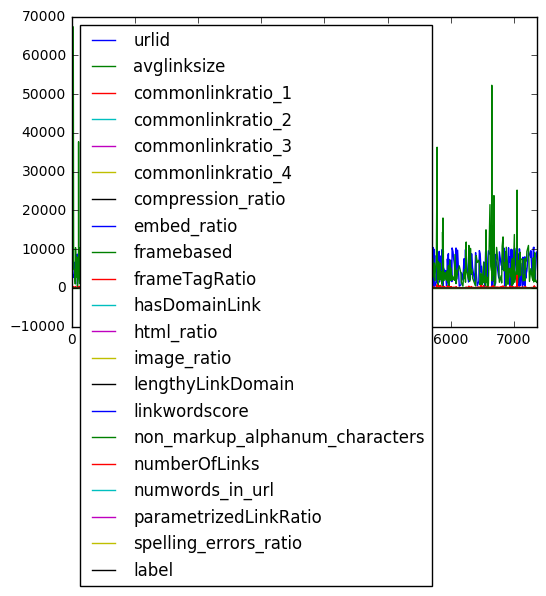

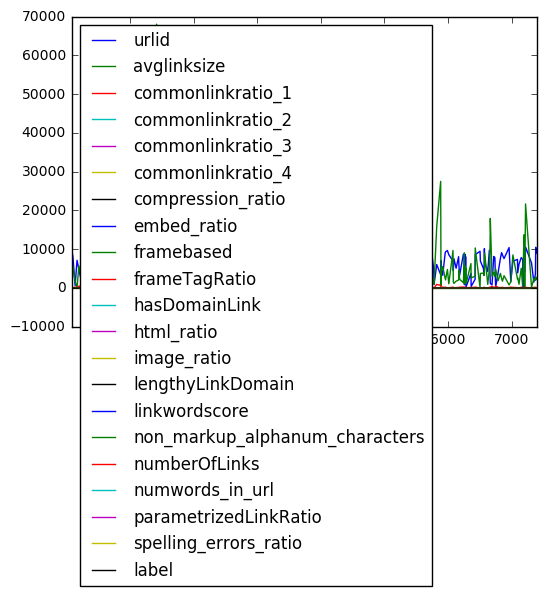

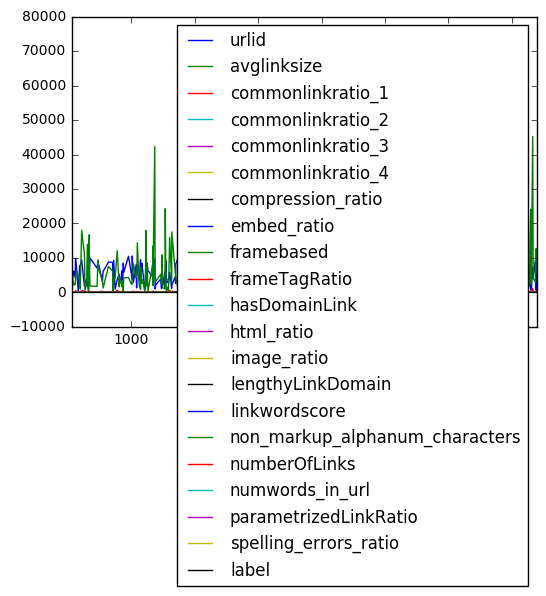

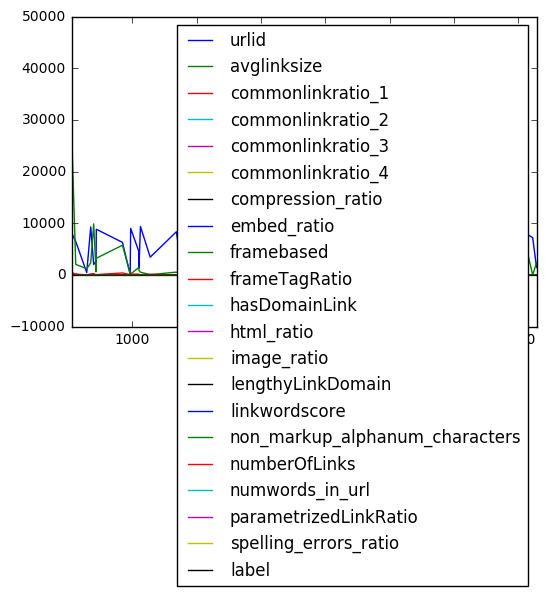

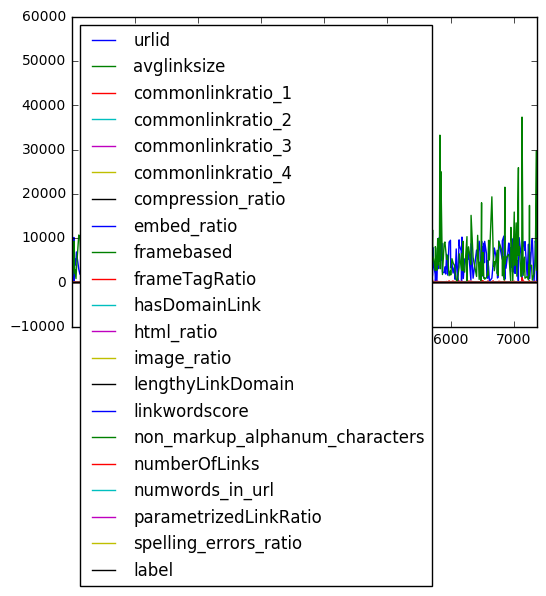

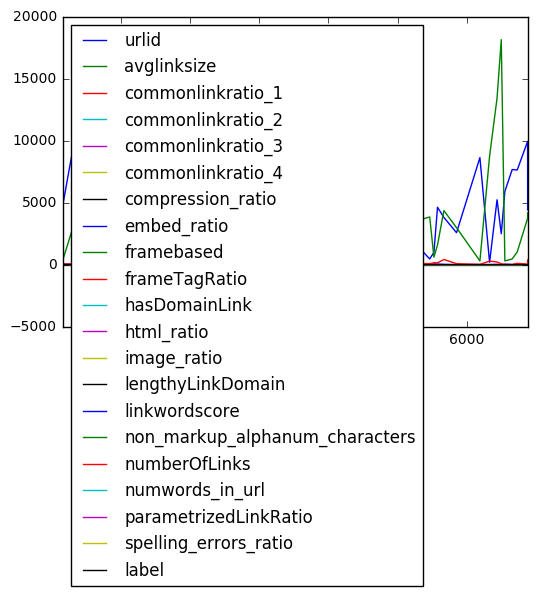

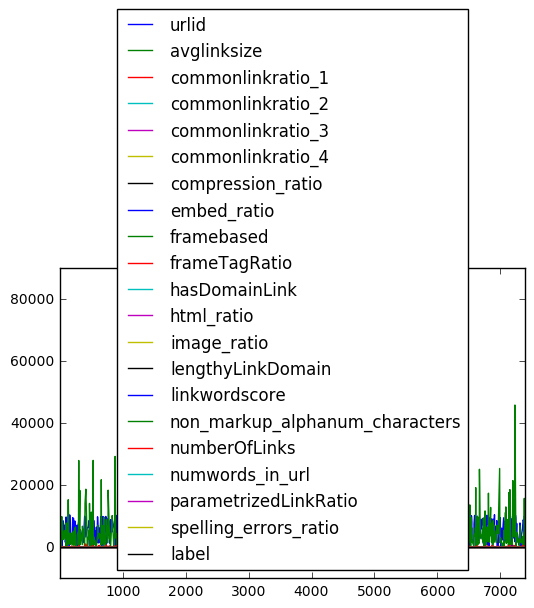

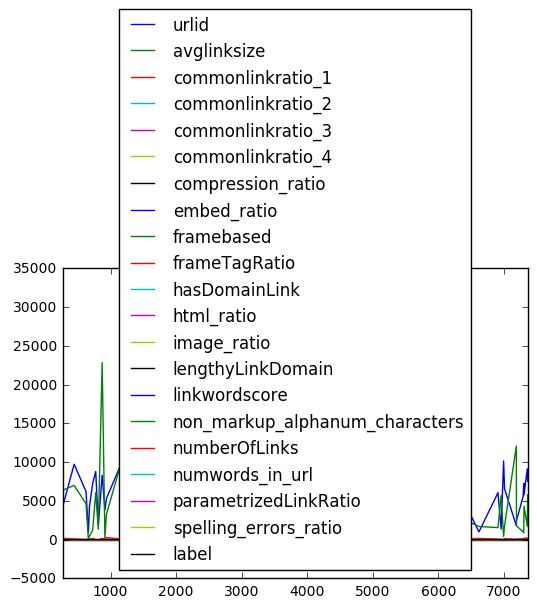

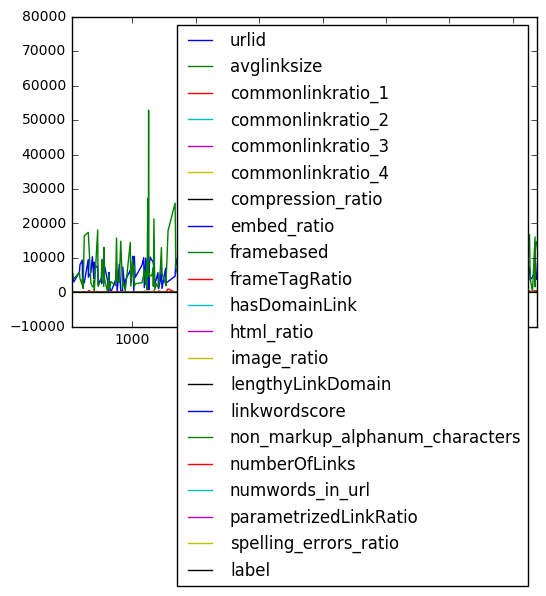

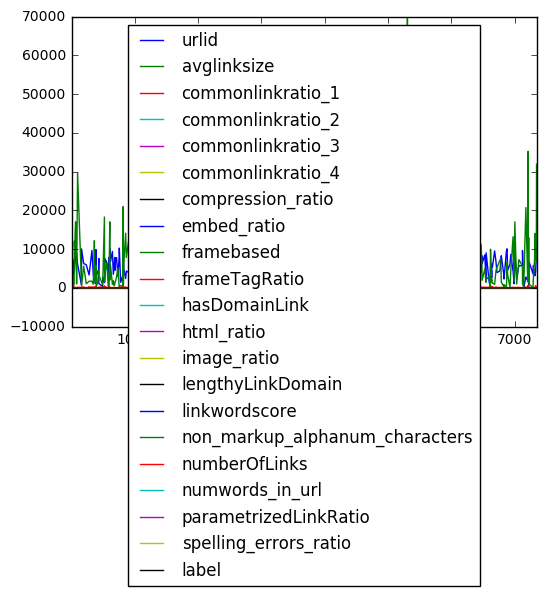

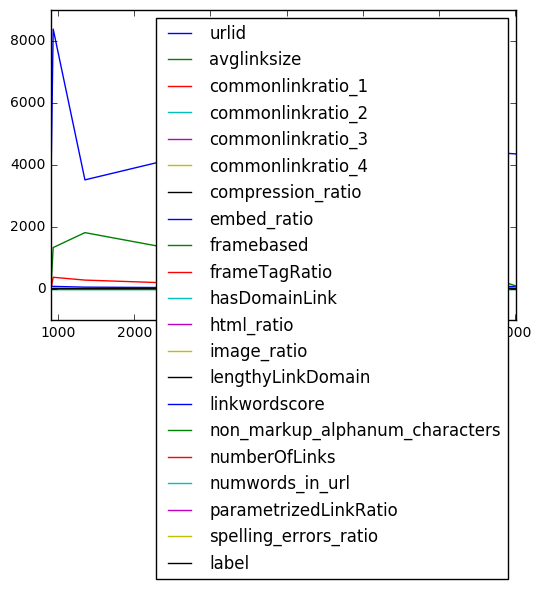

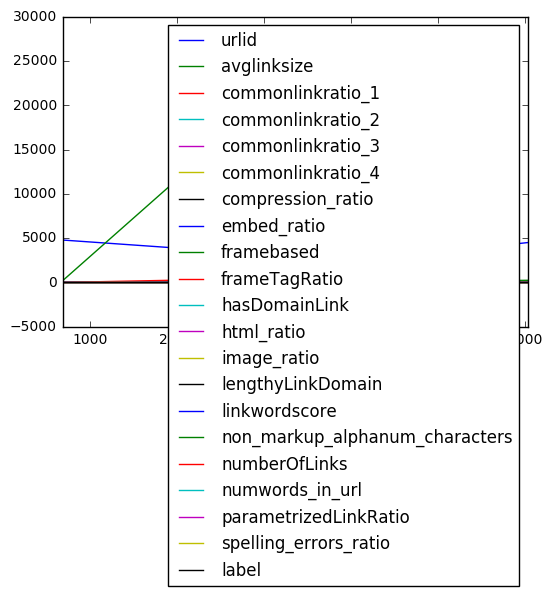

In [49]:
data.groupby('alchemy_category').plot()

In [46]:
data.groupby('alchemy_category').size

<bound method DataFrameGroupBy.size of <pandas.core.groupby.DataFrameGroupBy object at 0x000000000EE10828>>

In [47]:
data[data.label == 1].alchemy_category

1               recreation
2                   health
3                   health
6       arts_entertainment
8                        ?
9                        ?
12                  health
13                       ?
18              recreation
19                  health
21              recreation
23                       ?
24                       ?
28                       ?
29                       ?
30              recreation
31              recreation
33                business
36                       ?
38                       ?
39                  health
41              recreation
43                  health
44                       ?
47                       ?
51              recreation
53              recreation
54                  health
56                  sports
59                business
               ...        
7334                health
7336            recreation
7338      culture_politics
7340                health
7342                sports
7344                     ?
7

> ### Exercise: 5. How many articles are there per category?

In [ ]:
# ... #

> #### Let's try extracting some of the text content.
> ### Exercise: 6. Create a feature for the title containing 'recipe'. 
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [ ]:
# ... #

###  Let's Explore Some Decision Trees

 ### Demo: Build a decision tree model to predict the "evergreeness" of a given website. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

X = data[['image_ratio', 'html_ratio', 'recipe', 'label']].dropna()
y = X['label']
X.drop('label', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

# Helper function to visualize Decision Trees (creates a file tree.png)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                              out_file = dotfile,
                              feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)

## Decision Trees in scikit-learn

 ### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric.

In [ ]:
from sklearn.cross_validation import cross_val_score

# ... #

###  Adjusting Decision Trees to Avoid Overfitting

 ### Demo: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [ ]:
model = DecisionTreeClassifier(
                max_depth = 2,
                min_samples_leaf = 5)

model.fit(X, y)
build_tree_image(model)

 ### Demo: Build a random forest model to predict the evergreeness of a website. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X, y)

### Demo: Extracting importance of features

In [ ]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

 ### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance.

In [ ]:
# ... #

##  Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the _importance_ of the feature
  - 
3. **Bonus**: Just like the 'recipe' feature, add in similar text features and evaluate their performance.


In [ ]:
# ... #